In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [49]:
import RPi.GPIO as GPIO
import time
def get_temp_rh():
    data = []
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(4,GPIO.OUT)
    GPIO.output(4,GPIO.HIGH)
    time.sleep(0.025)
    GPIO.output(4,GPIO.LOW)
    time.sleep(0.02)
    GPIO.setup(4,GPIO.IN, pull_up_down=GPIO.PUD_UP)
    nsamples_end = 200
    for i in range(2200):
        data.append(GPIO.input(4))
    return data

In [189]:
import pickle
data = pickle.load(open('2018-12-25_20:43:16.389076_gpiovals.pkl','rb'))
high_low = []
low_high = []
for i in range(len(data)-1):
    if data[i]==0 and data[i+1]==1:
        low_high.append(i)
    if data[i]==1 and data[i+1]==0:
        high_low.append(i)

(0, 1000)

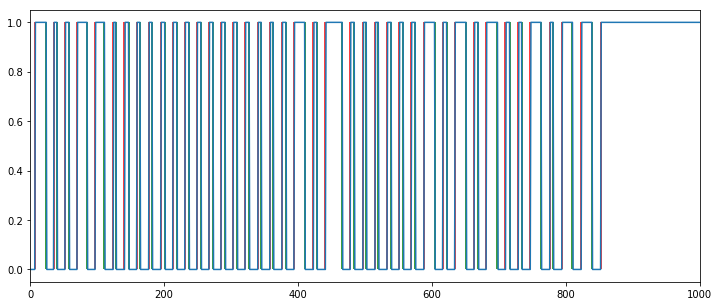

In [191]:
plt.figure(figsize=(12,5))
plt.plot(range(len(data)),data)
plt.vlines(low_high,0,1,colors='red')
plt.vlines(high_low,0,1,colors='green')
plt.xlim(0,1000)

In [186]:
# starts low, ends high
#first is low2high and last is low2high
print("Num High2Low = ",len(high_low))
print("Num Low2High = ",len(low_high))
#80us is
nsamp80us = high_low[0] - low_high[0]
nsamp50us = low_high[1] - high_low[0]
print(nsamp80us,nsamp50us,nsamp80us/80.,nsamp50us/50.)
lowlen = [low_high[i+2] - high_low[i+1] for i in range(40)]
bitlen = [low_high[i+2] - low_high[i+1] for i in range(40)]
highlen = [high_low[i+1] - low_high[i+1] for i in range(40)]

Num High2Low =  40
Num Low2High =  41
17 11 0.2125 0.22


IndexError: list index out of range

In [124]:
print(lowlen)
print(bitlen)
print(highlen)

[28, 27, 29, 29, 28, 28, 28, 29, 29, 28, 29, 28, 29, 28, 28, 29, 29, 29, 13, 29, 28, 29, 28, 29, 29, 29, 28, 29, 29, 28, 29, 28, 29, 29, 29, 28, 29, 29, 29, 29]
[41, 39, 66, 42, 41, 41, 41, 42, 42, 41, 42, 41, 42, 41, 41, 43, 42, 42, 25, 65, 41, 67, 41, 43, 42, 42, 41, 42, 42, 66, 42, 67, 42, 42, 67, 66, 67, 42, 42, 67]
[13, 12, 37, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 13, 13, 12, 36, 13, 38, 13, 14, 13, 13, 13, 13, 13, 38, 13, 39, 13, 13, 38, 38, 38, 13, 13, 38]


In [129]:
bits = [int(i > mean(lowlen)) for i in highlen]

In [132]:
the_bytes = []
byte = 0
for i in range(len(bits)):
    byte = byte << 1
    if bits[i]:
        byte = byte | 1
    else:
        byte = byte | 0
    if ((i+1) %8 == 0):
        the_bytes.append(byte)
        byte = 0

In [174]:
bin2dec = lambda bindata: int(str('0b'+''.join(str(i) for i in bindata)),2)

In [177]:
[bin2dec(bits[i*8:(i+1)*8]) for i in range(4)]

[32, 0, 20, 5]

In [152]:
(sum(the_bytes[0:4]) & 255) == the_bytes[4]

True

In [164]:
''.join(str(i) for i in bits[0:8])

'00100000'